# Proyecto de curso Machine Learning

## 1.) Curación de datos

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = 'https://archive.ics.uci.edu/ml/'\
'machine-learning-databases/poker/poker-hand-testing.data'
print('From URL:', dataset)
df = pd.read_csv(dataset, header=None, names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','CLASS'])
df.head(50)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
5,1,3,4,5,3,4,1,12,4,6,0
6,2,6,4,11,2,3,4,9,1,7,0
7,3,2,4,9,3,7,4,3,4,5,0
8,4,4,3,13,1,8,3,9,3,10,0
9,1,9,3,8,4,4,1,7,3,5,0


In [36]:
# Informacion del DataFrame
print(df.info())
print('shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1000000 non-null  int64
 1   C1      1000000 non-null  int64
 2   S2      1000000 non-null  int64
 3   C2      1000000 non-null  int64
 4   S3      1000000 non-null  int64
 5   C3      1000000 non-null  int64
 6   S4      1000000 non-null  int64
 7   C4      1000000 non-null  int64
 8   S5      1000000 non-null  int64
 9   C5      1000000 non-null  int64
 10  CLASS   1000000 non-null  int64
dtypes: int64(11)
memory usage: 83.9 MB
None
shape: (1000000, 11)


In [37]:
df.value_counts('CLASS')

CLASS
0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: count, dtype: int64

## 2.) Selección de Características

### 2.1.) Componentes Principales (PCA)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [78]:
# Estandarizar los rangos de las cartas
scaler = StandardScaler()
X = df.iloc[:,:-1].values
X_scaled = scaler.fit_transform(X)

In [79]:
# Aplicar PCA

pca = PCA(n_components=None)
Xpca = pca.fit_transform(X_scaled)
pilambda = pca.explained_variance_ratio_
Xloadings = pca.components_.T * np.sqrt(pilambda)

In [80]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print('Varianza explicada por cada componente:', explained_variance)
print('Varianza explicada acumulada:', cumulative_explained_variance)

Varianza explicada por cada componente: [0.10255728 0.10223754 0.10206878 0.10202219 0.10189402 0.10185269
 0.10169018 0.101626   0.0921576  0.09189372]
Varianza explicada acumulada: [0.10255728 0.20479482 0.3068636  0.40888579 0.51077981 0.6126325
 0.71432269 0.81594868 0.90810628 1.        ]


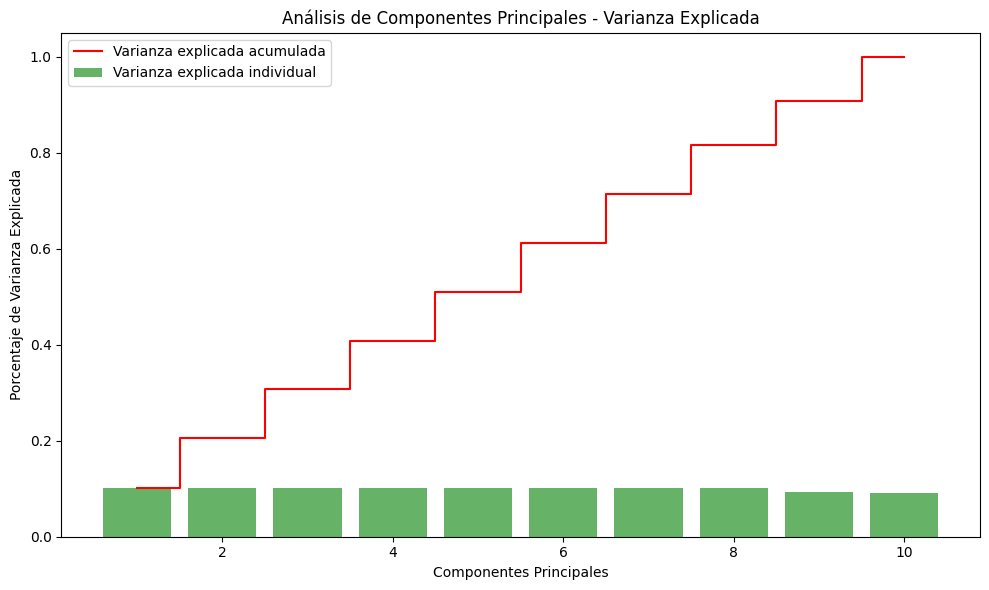

In [81]:
# Graficar la varianza explicada y la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center',
        label='Varianza explicada individual', color='g')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Varianza explicada acumulada', color='r')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Análisis de Componentes Principales - Varianza Explicada')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

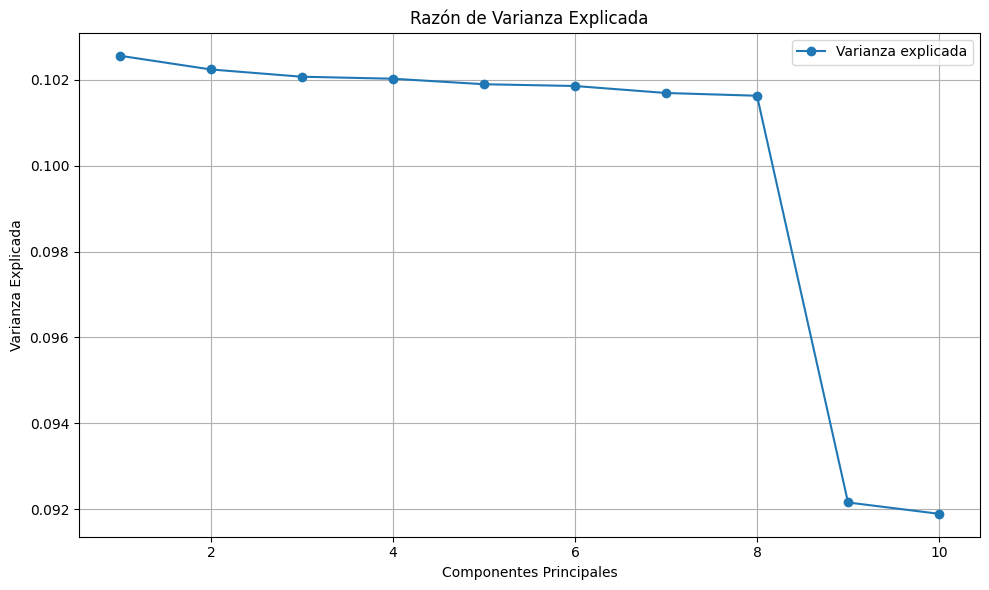

In [82]:
# Razon de varianza explicada

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Varianza explicada')
plt.title('Razón de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data


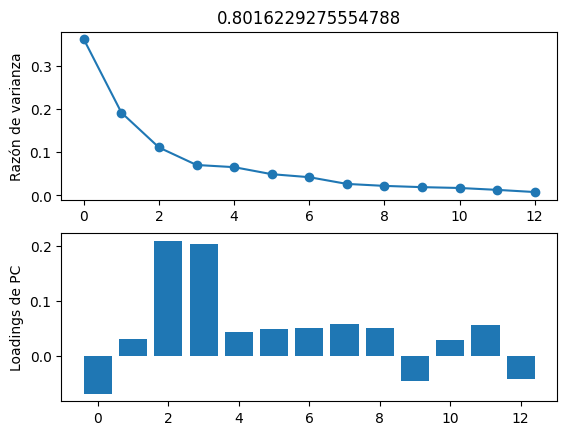

In [ ]:
s = 'https://archive.ics.uci.edu/ml/'\
'machine-learning-databases/wine/wine.data'
#'machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None)
df.columns = ['Class label', 'Alcohol',
					'Malic acid', 'Ash',
					'Alcalinity of ash', 'Magnesium',
					'Total phenols', 'Flavanoids',
					'Nonflavanoid phenols',
					'Proanthocyanins',
					'Color intensity', 'Hue',
					'OD280/OD315 of diluted wines',
					'Proline']
X = df.iloc[:,1:].values
Xnorm = (X-np.mean(X, axis=0))/np.std(X, axis=0)
pca = PCA(n_components=None)
Xpca = pca.fit_transform(Xnorm)
pilambda = pca.explained_variance_ratio_
Xloadings = pca.components_.T * np.sqrt(pilambda)
# print(pilambda, Xpca.shape)
plt.subplot(211)
# plt.bar(range(13),pilambda)
plt.plot(range(13),pilambda,'o-')
plt.ylabel('Razón de varianza')
plt.title(np.sum(pilambda[0:5]))
plt.subplot(212)
plt.bar(range(13),Xloadings[:,2])
plt.ylabel('Loadings de PC')
plt.show()